<a href="https://colab.research.google.com/github/prisha255/Data-Analysis-EV/blob/main/EV_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Electric_Vehicle_Population_Data....csv')

# Display first few rows
print(df.head())

Saving Electric_Vehicle_Population_Data....csv to Electric_Vehicle_Population_Data....csv
   VIN (1-10)    County     City State  Postal Code  Model Year     Make  \
0  5YJ3E1EBXK      King  Seattle    WA        98178        2019    TESLA   
1  5YJYGDEE3L    Kitsap  Poulsbo    WA        98370        2020    TESLA   
2  KM8KRDAF5P    Kitsap   Olalla    WA        98359        2023  HYUNDAI   
3  5UXTA6C0XM    Kitsap  Seabeck    WA        98380        2021      BMW   
4  JTMAB3FV7P  Thurston  Rainier    WA        98576        2023   TOYOTA   

        Model                   Electric Vehicle Type  \
0     MODEL 3          Battery Electric Vehicle (BEV)   
1     MODEL Y          Battery Electric Vehicle (BEV)   
2     IONIQ 5          Battery Electric Vehicle (BEV)   
3          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
4  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Ve

In [2]:
# Dataset shape and column names
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())

Shape of dataset: (9951, 17)
Columns: ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']


In [3]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Check for null values
print("Null values in each column:\n", df.isnull().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Fill missing model_year with most frequent value
df['model_year'] = df['model_year'].fillna(df['model_year'].mode()[0])

# Convert model_year to integer
df['model_year'] = df['model_year'].astype(int)

# Preview cleaned data
print(df.head())

# Summary statistics of numeric columns
print(df.describe())

Null values in each column:
 vin_(1-10)                                           0
county                                               0
city                                                 0
state                                                0
postal_code                                          0
model_year                                           0
make                                                 0
model                                                0
electric_vehicle_type                                0
clean_alternative_fuel_vehicle_(cafv)_eligibility    0
electric_range                                       4
base_msrp                                            4
legislative_district                                 0
dol_vehicle_id                                       0
vehicle_location                                     0
electric_utility                                     0
2020_census_tract                                    0
dtype: int64
   vin_(1-10)    county

In [4]:
# Most common EV makes
print("Top 10 makes:\n", df['make'].value_counts().head(10))

# Count of EVs by city
print("Top 10 cities:\n", df['city'].value_counts().head(10))

# Filter: Vehicles with electric range > 200 mile
high_range_vehicles = df[df['electric_range'] > 200]
print("Vehicles with range > 200:\n", high_range_vehicles[['make', 'model', 'electric_range']].head())

# Sort by model year (descending)
sorted_by_year = df.sort_values(by='model_year', ascending=False)
print("Sorted by model year:\n", sorted_by_year[['make', 'model', 'model_year']].head())

# Count of EVs per year
grouped_by_year = df.groupby('model_year').size()
print("EV count by year:\n", grouped_by_year)

# Count of vehicles by make and model
make_model_count = df.groupby(['make', 'model']).size().reset_index(name='count')
print("Top make-model combos:\n", make_model_count.sort_values(by='count', ascending=False).head())

# Define variables needed for plots
top_makes = df['make'].value_counts().head(10)
top_cities = df['city'].value_counts().head(10)
yearly_counts = df['model_year'].value_counts().sort_index()
top_5_makes = df['make'].value_counts().head(5).index
df_top_makes = df[df['make'].isin(top_5_makes)]
ev_type_counts = df['electric_vehicle_type'].value_counts()

Top 10 makes:
 make
TESLA         4407
NISSAN         699
CHEVROLET      664
BMW            516
KIA            445
FORD           419
TOYOTA         417
HYUNDAI        344
VOLVO          267
VOLKSWAGEN     259
Name: count, dtype: int64
Top 10 cities:
 city
Seattle              2061
Bellevue             1248
Kirkland             1244
Vancouver             781
Redmond               488
Kent                  385
Renton                283
Bothell               236
Bainbridge Island     221
Olympia               188
Name: count, dtype: int64
Vehicles with range > 200:
     make    model  electric_range
0  TESLA  MODEL 3           220.0
1  TESLA  MODEL Y           291.0
5  TESLA  MODEL S           265.0
8  TESLA  MODEL 3           215.0
9  TESLA  MODEL 3           215.0
Sorted by model year:
          make    model  model_year
9949    TESLA  MODEL 3        2025
2474  HYUNDAI  IONIQ 6        2025
4942    TESLA  MODEL X        2025
9906   NISSAN     LEAF        2025
9912    TESLA  MODEL Y     

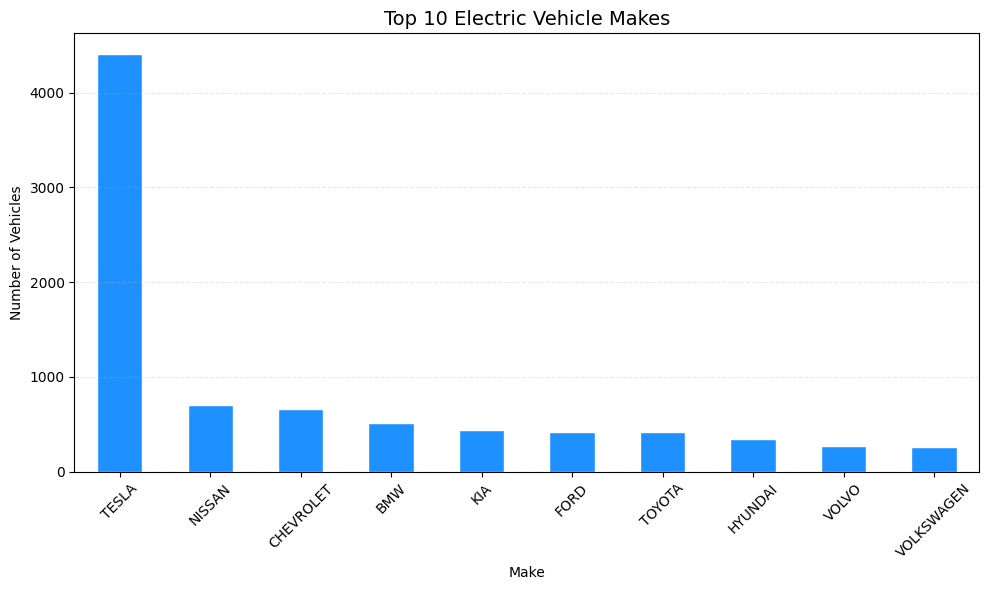

In [5]:
# Top 10 EV Makes
plt.figure(figsize=(10,6))
top_makes.plot(kind='bar', color='dodgerblue', edgecolor='white')
plt.title("Top 10 Electric Vehicle Makes", fontsize=14)
plt.xlabel("Make")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

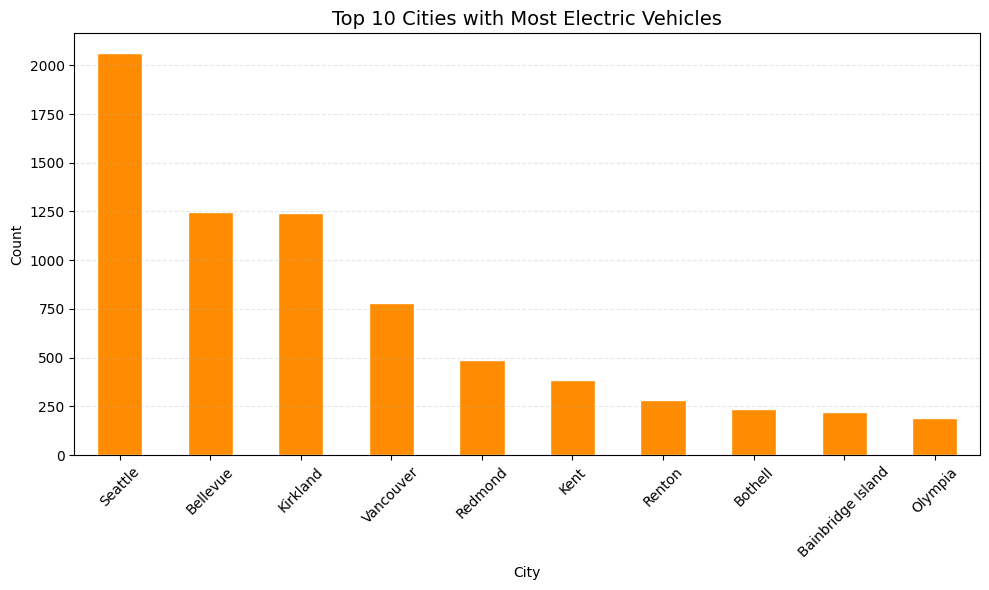

In [6]:
# Top 10 Cities with Most EVs
plt.figure(figsize=(10,6))
top_cities.plot(kind='bar', color='darkorange', edgecolor='white')
plt.title("Top 10 Cities with Most Electric Vehicles", fontsize=14)
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

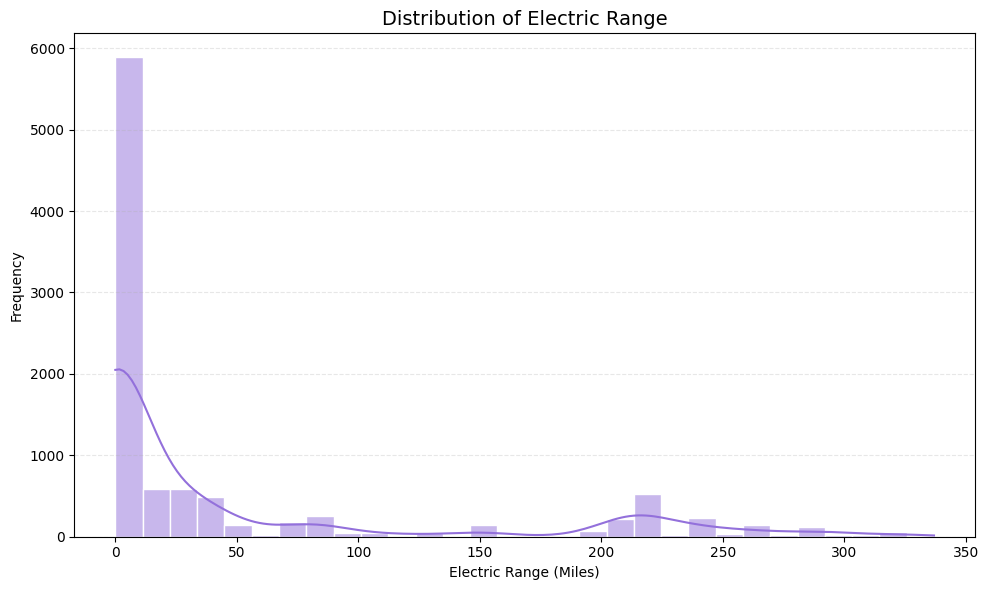

In [7]:
# Electric Range Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['electric_range'], bins=30, kde=True, color='mediumpurple', edgecolor='white')
plt.title("Distribution of Electric Range", fontsize=14)
plt.xlabel("Electric Range (Miles)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

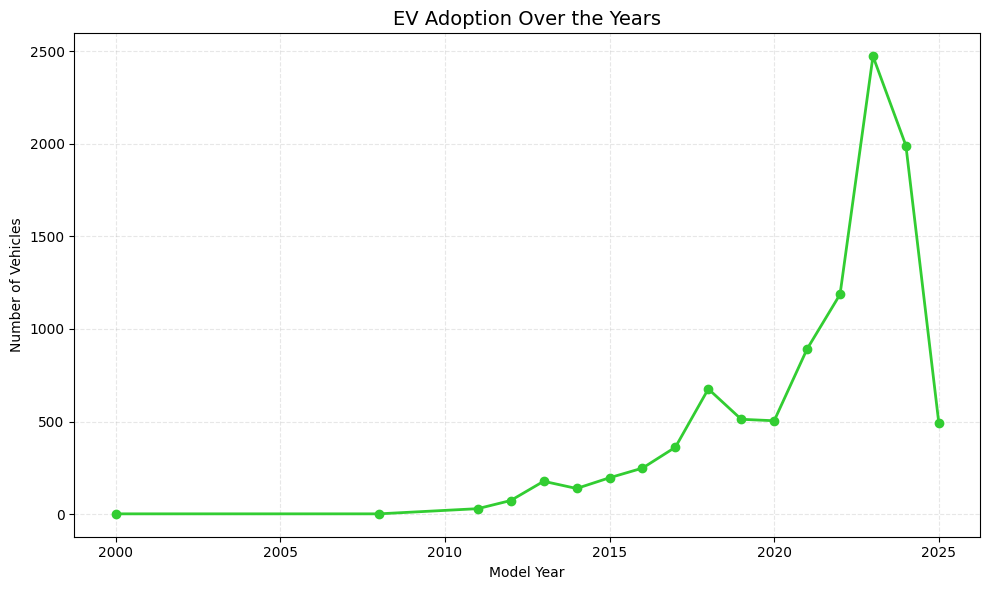

In [8]:
# EV Adoption Over Years
plt.figure(figsize=(10,6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='limegreen', markersize=6, linewidth=2)
plt.title("EV Adoption Over the Years", fontsize=14)
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

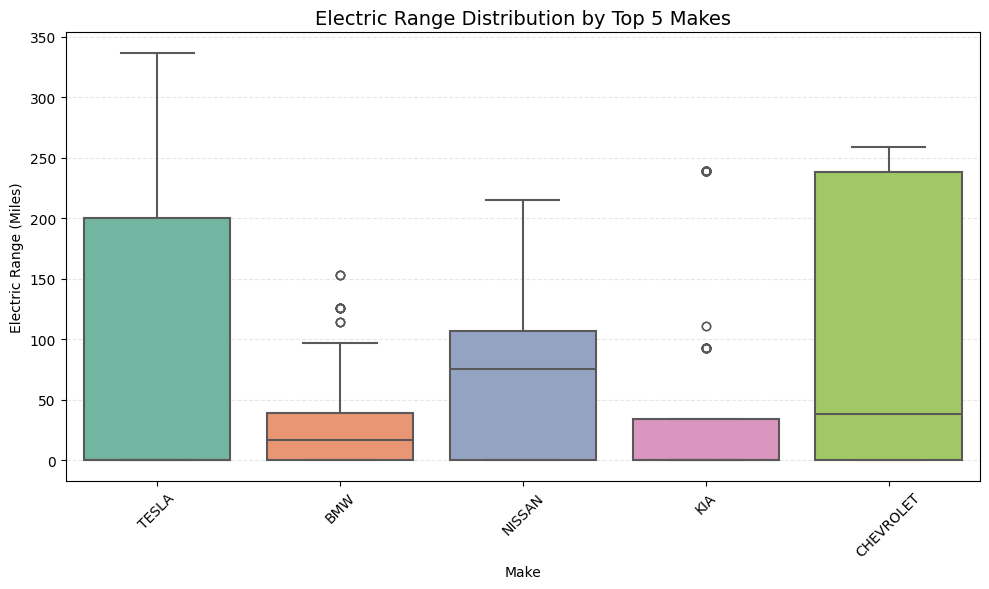

In [9]:
# Boxplot: Electric Range by Top 5 Makes
plt.figure(figsize=(10,6))
sns.boxplot(x='make', y='electric_range', data=df_top_makes,
            hue='make', palette='Set2', linewidth=1.5, legend=False)
plt.title("Electric Range Distribution by Top 5 Makes", fontsize=14)
plt.xlabel("Make")
plt.ylabel("Electric Range (Miles)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

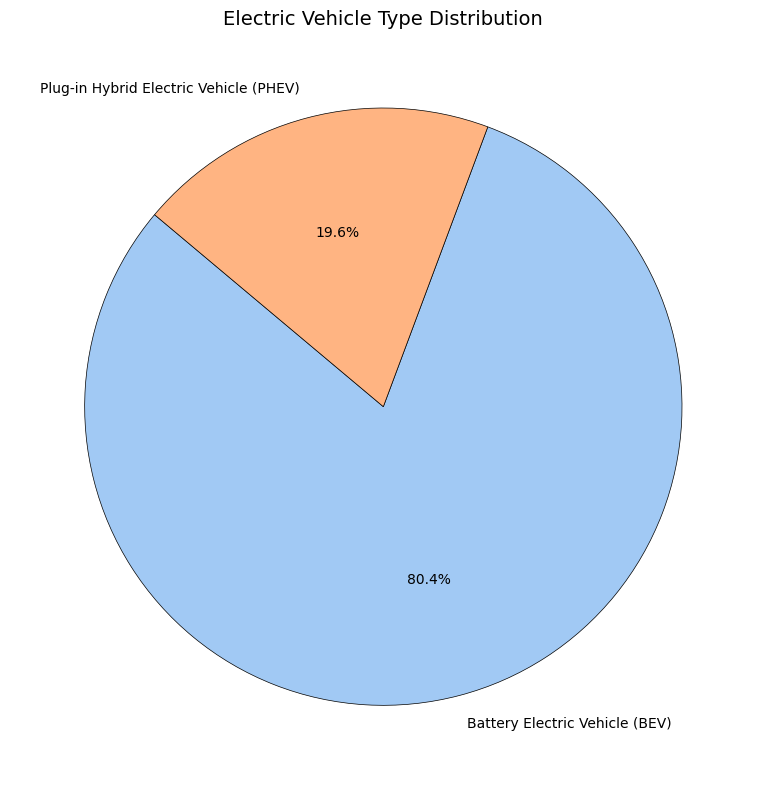

In [10]:
# Pie chart: Electric Vehicle Type
plt.figure(figsize=(8,8))
plt.pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title("Electric Vehicle Type Distribution", fontsize=14)
plt.tight_layout()
plt.show()

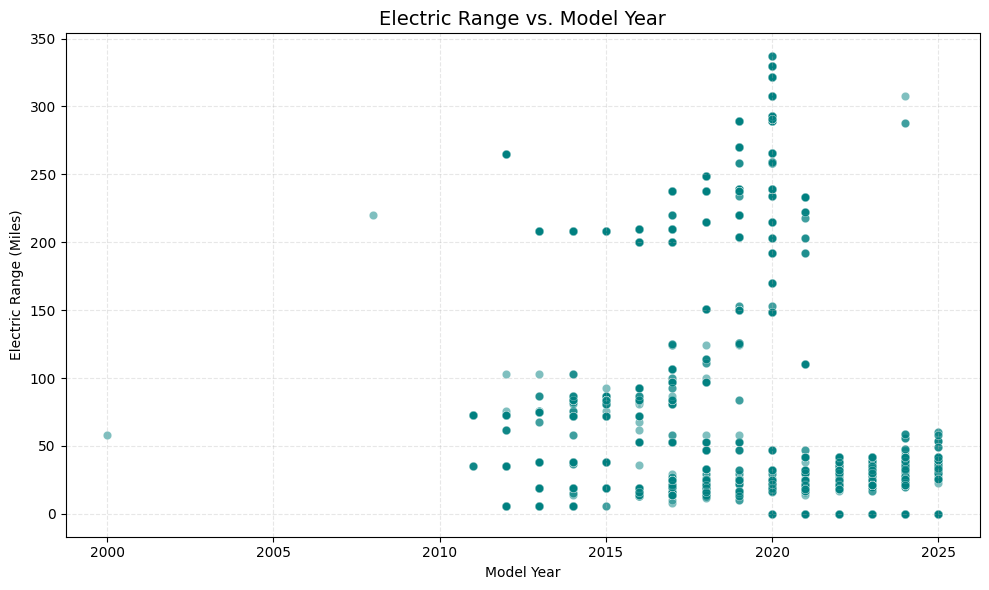

In [11]:
# Scatter Plot: Electric Range vs. Model Year
plt.figure(figsize=(10,6))
plt.scatter(df['model_year'], df['electric_range'], alpha=0.5, color='teal', edgecolor='white', linewidth=0.3)
plt.title("Electric Range vs. Model Year", fontsize=14)
plt.xlabel("Model Year")
plt.ylabel("Electric Range (Miles)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

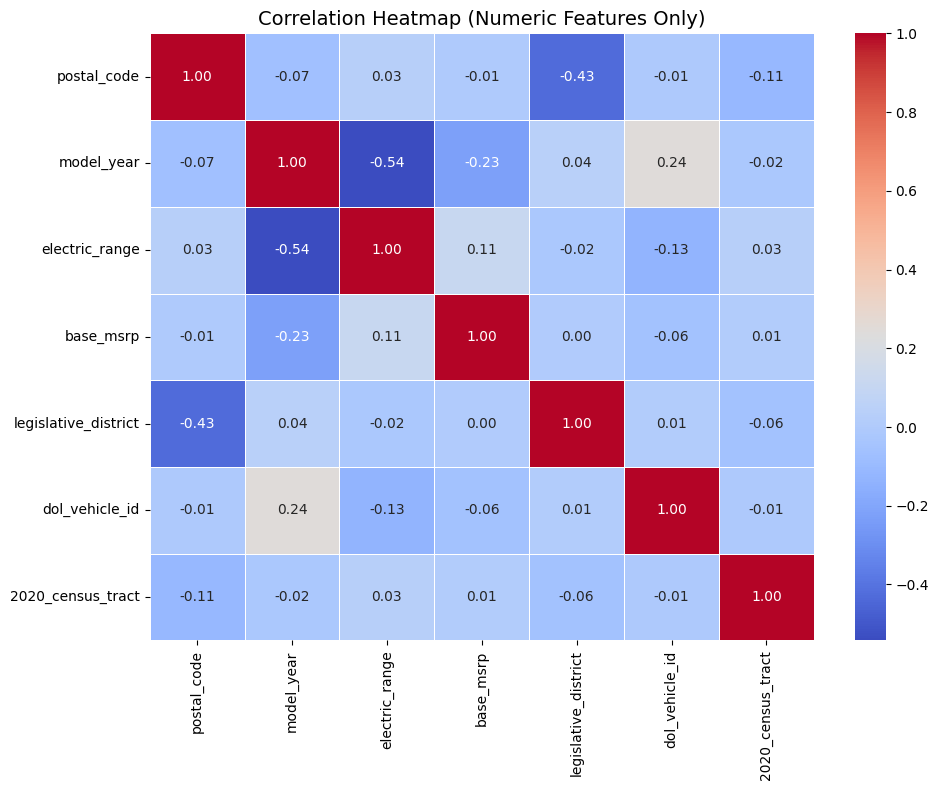

In [12]:
# Correlation Heatmaps
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=14)
plt.tight_layout()
plt.show()